In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



In [61]:
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [62]:
data=pd.read_csv('F:/ML-2019/Iris/Iris.csv')

In [63]:
data.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
#1.Nomissing values
#2.only target is character type
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [20]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [65]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [66]:
data=data.drop('Id',axis=1)

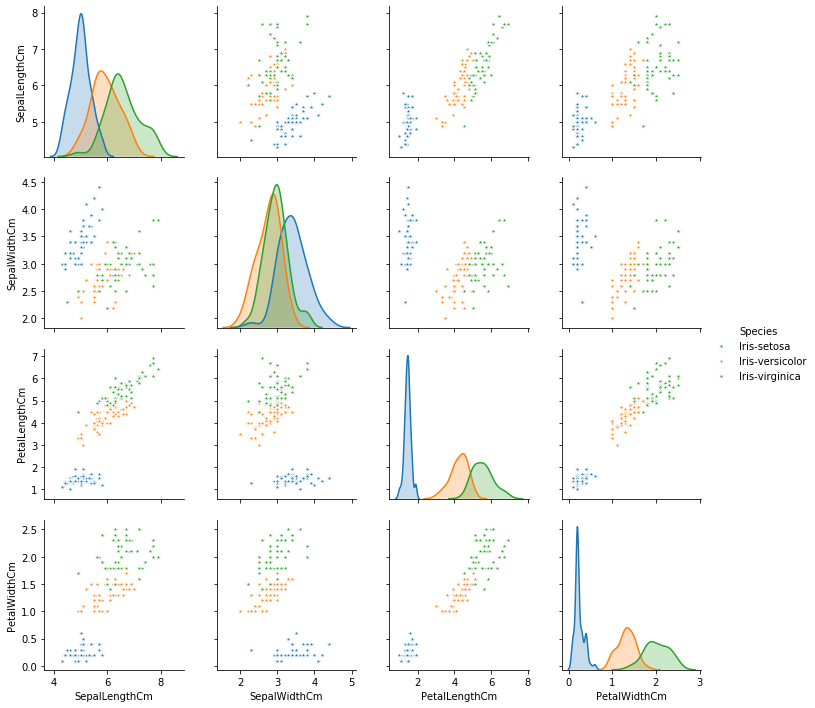

In [23]:
#1.Relationship between features is less in Iris-setosa
#2.Most of the featureshave peak value in Iris-setosa
sns.pairplot(data,hue='Species',markers='*')

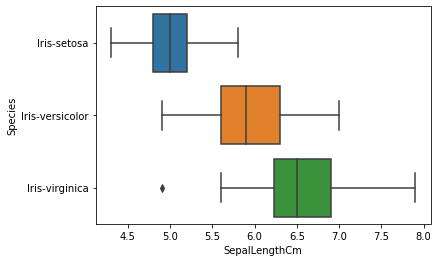

In [26]:
sns.boxplot(x='SepalLengthCm',y='Species',data=data)
#1.Iris-setosa have short sepals compared to others, and the quartiles are equally divided
#2.But in others  seplas lengths fall above 50 quartile region

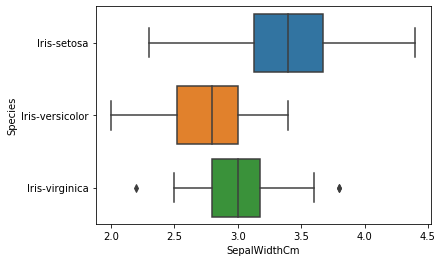

In [28]:
sns.boxplot(x='SepalWidthCm',y='Species',data=data)
#1.Iris-setosa have large sepals
#2.Iris-virgina have outliers

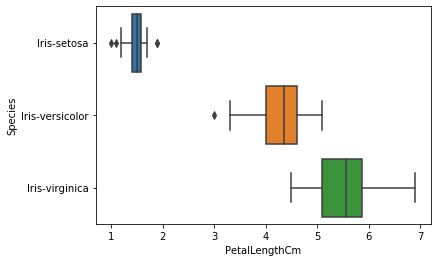

In [29]:
sns.boxplot(x='PetalLengthCm',y='Species',data=data)
#1.Iris-virginica have long petals
#2.Iris-setosa have more outliers

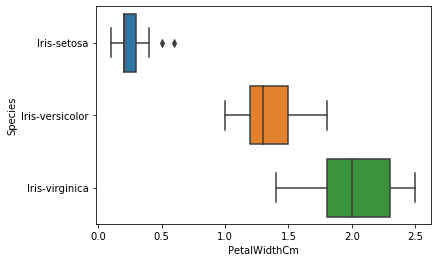

In [30]:
sns.boxplot(x='PetalWidthCm',y='Species',data=data)

In [67]:
x=data.drop('Species',axis=1)
y=data['Species']
y=y.map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [68]:
#Splitting data to train and test , which will help us to find the moreacurate model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4)


In [69]:
classifier=tree.DecisionTreeClassifier()
#train the model
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
predictions=classifier.predict(x_test)

In [71]:
print(metrics.accuracy_score(y_test,predictions))

0.9666666666666667


In [72]:
classifier2=LogisticRegression()
classifier2.fit(x_train,y_train)
prediction2=classifier2.predict(x_test)
print(metrics.accuracy_score(y_test,prediction2))

0.95


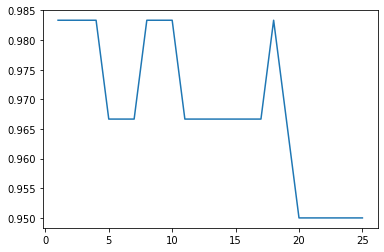

In [85]:
k_range=list(range(1,26))
score=[]
for k in k_range:
    classifier3=KNeighborsClassifier(n_neighbors=k)
    classifier3.fit(x_train,y_train)
    predictions=classifier3.predict(x_test)
    score.append(metrics.accuracy_score(y_test,predictions))
plt.plot(k_range,score)
plt.xlabel='k Value'
plt.ylabel='Score'
plt.show()

In [86]:
classifier4=KNeighborsClassifier(n_neighbors=12)
classifier4.fit(x_train,y_train)
predictions=classifier4.predict(x_test)
print(metrics.accuracy_score(y_test,predictions))

0.9666666666666667


In [87]:
classifier4=KNeighborsClassifier(n_neighbors=4)
classifier4.fit(x_train,y_train)
predictions=classifier4.predict(x_test)
print(metrics.accuracy_score(y_test,predictions))

0.9833333333333333
